In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

assigned_features = ['Liverfunction', 'age', 'height(cm)', 'Cholesterol', 'Gtp', 'Urine protein', 'AST', 'dental caries', 'ALT', 'systolic', 'eyesight(left)', 'smoking']
data = pd.read_csv("./Used_data.csv")
data = data[assigned_features]
data.head()

,Liverfunction,age,height(cm),Cholesterol,Gtp,Urine protein,AST,dental caries,ALT,systolic,eyesight(left),smoking
0,1.136364,55,165,172,27,1,22,0,25,135,0.5,1
1,0.851852,70,165,194,37,1,27,1,23,146,0.6,0
2,1.148148,20,170,178,53,1,27,0,31,118,0.4,1
3,1.350000,35,180,180,30,1,20,1,27,131,1.5,0
4,0.684211,30,165,155,17,1,19,0,13,121,1.5,1


In [ ]:
y = data["smoking"]

# Feature Engineering

## Handling missing data

In [ ]:
data.shape

(159256, 12)

In [ ]:
# checking number of null values in each column
data.isnull().sum()

Liverfunction     0
age               0
height(cm)        0
Cholesterol       0
Gtp               0
Urine protein     0
AST               0
dental caries     0
ALT               0
systolic          0
eyesight(left)    0
smoking           0
dtype: int64

The given dataset happens to have no null values, but we will attatch code section to handle null vales, so that this code could be used with other datasets.

In [ ]:
# Filling empty values with column mean
features = data.columns.values[0: -1]
row_indices = data.index.tolist()

for feature in features:
  mean = data[feature].mean()
  for i in row_indices:
    if data[feature][i] is None:
      data[feature][i] = mean

In [ ]:
data.shape

(159256, 12)

## Removing outliers using percentile method

In [ ]:
# Examining data to see which features might have outliers
pd.set_option('display.max_columns', None)
data.describe()

,Liverfunction,age,height(cm),Cholesterol,Gtp,Urine protein,AST,dental caries,ALT,systolic,eyesight(left),smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,1.019722,44.306626,165.266929,195.796165,36.216004,1.074233,25.516853,0.197996,26.550296,122.503648,1.005798,0.437365
std,0.446632,11.842286,8.818970,28.396959,31.204643,0.347856,9.464882,0.398490,17.753070,12.729315,0.402113,0.496063
min,0.023256,20.000000,135.000000,77.000000,2.000000,1.000000,6.000000,0.000000,1.000000,77.000000,0.100000,0.000000
25%,0.750000,40.000000,160.000000,175.000000,18.000000,1.000000,20.000000,0.000000,16.000000,114.000000,0.800000,0.000000
50%,0.941176,40.000000,165.000000,196.000000,27.000000,1.000000,24.000000,0.000000,22.000000,121.000000,1.000000,0.000000
75%,1.222222,55.000000,170.000000,217.000000,44.000000,1.000000,29.000000,0.000000,32.000000,130.000000,1.200000,1.000000
max,94.000000,85.000000,190.000000,393.000000,999.000000,6.000000,778.000000,1.000000,2914.000000,213.000000,9.900000,1.000000


In [ ]:
# Get dataset shape before outliers removal to compare it with shape after removal
data.shape

(159256, 12)

In [ ]:
cols = data.columns
for i in range(1, len(cols)-1):
  if cols[i] not in ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries']:
    min_threshold, max_threshold = data[cols[i]].quantile([0.001, 0.999])
    data = data[(data[cols[i]]<max_threshold) & (data[cols[i]]>min_threshold)]
    print(f"{cols[i]} -> {data.shape}")

Cholesterol -> (158916, 12)
Gtp -> (158558, 12)
AST -> (158173, 12)
ALT -> (157795, 12)
systolic -> (156842, 12)
eyesight(left) -> (155464, 12)


In [ ]:
# dataset shape after outlier removal
data.shape

(155464, 12)

## Applying different normalization methods

In [ ]:
# saving type of normalization required by each feature as deduced from analysis section

feature_normalization_types = {
    'Liverfunction': 'min_max',
    'age': 'min_max',
    'height(cm)': 'z_score',
    'Cholesterol': 'z_score',
    'Gtp': 'min_max',
    'Urine protein': 'z_score',
    'AST': 'min_max',
    'dental caries': None,
    'ALT': 'min_max',
    'systolic': 'z_score',
    'eyesight(left)': 'min_max',
    'smoking': None
}

### Z-Score Normalization (Standardization)

It transforms the data to have a mean of 0 and a standard deviation of 1. This method is useful when the data has varying scales.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for feature in assigned_features:
  if feature_normalization_types[feature] == 'z_score':
    column_values = data[feature].values.astype(float)
    column_values_scaled = scaler.fit_transform(column_values.reshape(-1, 1))
    data[feature] = column_values_scaled

<ipython-input-264-06473b6c0f5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = column_values_scaled
<ipython-input-264-06473b6c0f5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = column_values_scaled
<ipython-input-264-06473b6c0f5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

### Min-Max Scaling (MinMaxScaler)

This method scales the data to a fixed range, usually between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for feature in assigned_features:
  if feature_normalization_types[feature] == 'min_max':
    column_values = data[feature].values.astype(float)
    column_values_scaled = scaler.fit_transform(column_values.reshape(-1, 1))
    data[feature] = column_values_scaled

<ipython-input-265-101ac750b660>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = column_values_scaled
<ipython-input-265-101ac750b660>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = column_values_scaled
<ipython-input-265-101ac750b660>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
data.describe()

,Liverfunction,age,height(cm),Cholesterol,Gtp,Urine protein,AST,dental caries,ALT,systolic,eyesight(left),smoking
count,155464.000000,155464.000000,1.554640e+05,1.554640e+05,155464.000000,1.554640e+05,155464.000000,155464.000000,155464.000000,1.554640e+05,155464.000000,155464.000000
mean,0.092358,0.373675,-1.199747e-15,5.996450e-17,0.092130,4.611599e-17,0.188643,0.197518,0.165728,1.475118e-16,0.470281,0.439304
std,0.039183,0.181893,1.000003e+00,1.000003e+00,0.091617,1.000003e+00,0.113604,0.398128,0.123500,1.000003e+00,0.176240,0.496304
min,0.000000,0.000000,-3.442021e+00,-2.814135e+00,0.000000,-2.128080e-01,0.000000,0.000000,0.000000,-2.547048e+00,0.000000,0.000000
25%,0.063788,0.307692,-6.041281e-01,-7.438430e-01,0.033113,-2.128080e-01,0.112676,0.000000,0.076923,-6.933809e-01,0.352941,0.000000
50%,0.084050,0.307692,-3.654957e-02,4.144023e-02,0.062914,-2.128080e-01,0.169014,0.000000,0.128205,-1.292212e-01,0.470588,0.000000
75%,0.114077,0.538462,5.310290e-01,7.553341e-01,0.119205,-2.128080e-01,0.239437,0.000000,0.213675,5.961270e-01,0.588235,1.000000
max,1.000000,1.000000,2.801343e+00,3.396742e+00,1.000000,1.424192e+01,1.000000,1.000000,1.000000,3.739302e+00,1.000000,1.000000


## Feature selection

### Information gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

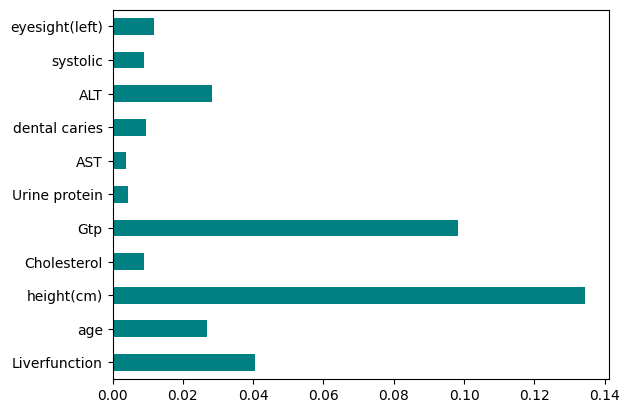

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
# Picking 8 features with heighest importance value

features = data.columns.values
information_gain_selected_features = []

for i in range(0, 8):
  max_importance = max(importances)
  max_importance_index = np.where(importances==max_importance)[0][0]

  if features[max_importance_index] != 'id':
    information_gain_selected_features.append(features[max_importance_index])
  importances[max_importance_index] = 0

In [ ]:
print(information_gain_selected_features)

['height(cm)', 'Gtp', 'Liverfunction', 'ALT', 'age', 'eyesight(left)', 'dental caries', 'systolic']


### Correlation Coefficient

Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

<Axes: >

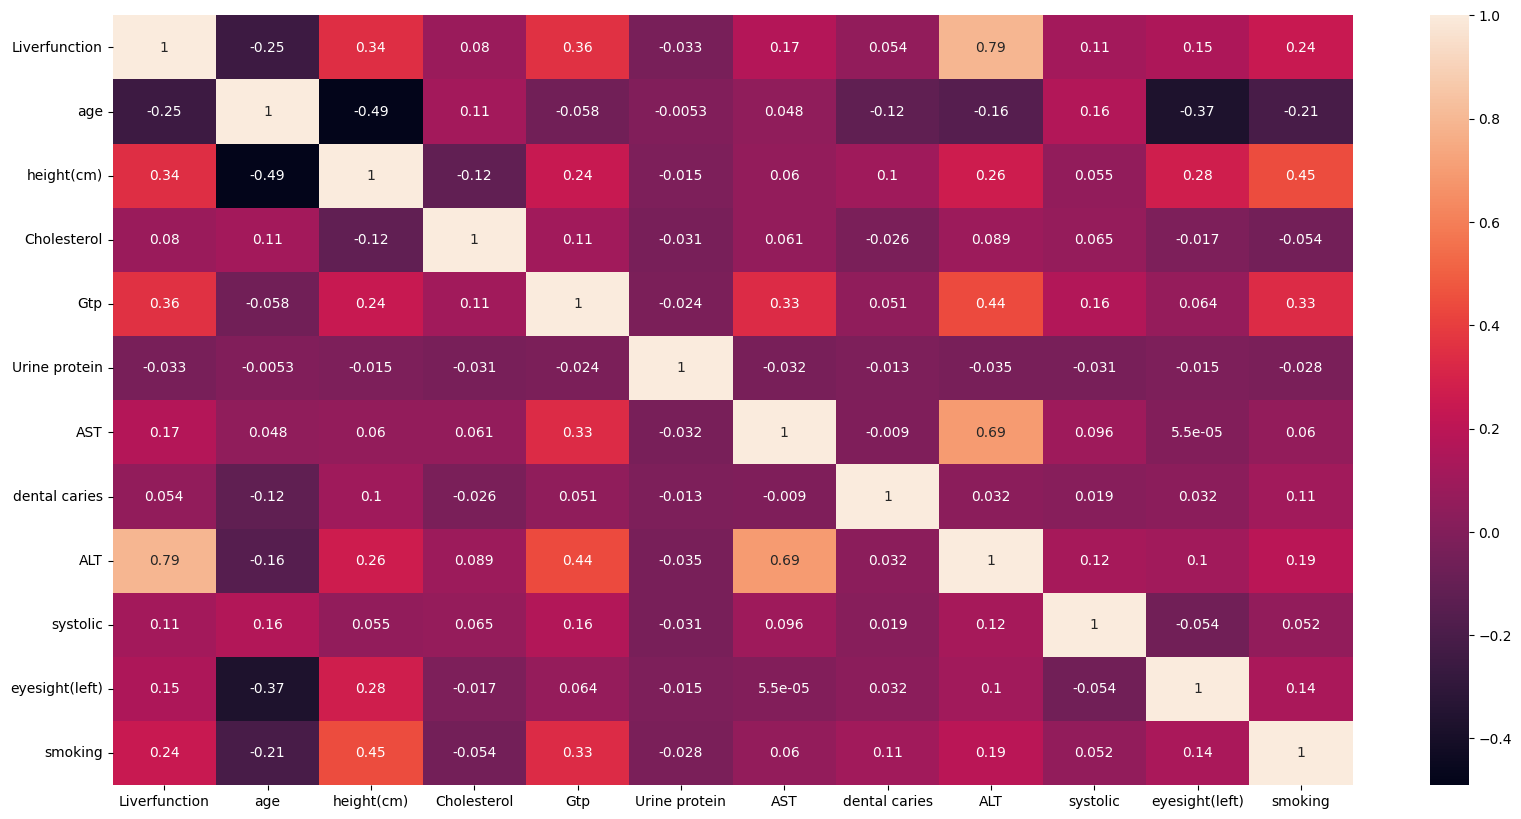

In [ ]:
import seaborn as sns
# correlation matrix
correlation = data.corr()

# Plotting Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)

In [ ]:
removed_features = []
features = data.columns.values
threshold = 0.5

for el_i in features:
  for el_j in features:
    if el_i != el_j and correlation[el_i][el_j] > threshold and el_i not in removed_features and el_j not in removed_features:
      removed_features.append(el_j)

In [ ]:
print(removed_features)

['ALT']


In [ ]:
correlation_coefficient_selected_features = []

for feature in features:
  if feature not in removed_features and feature != 'id':
    correlation_coefficient_selected_features.append(feature)

In [ ]:
print(correlation_coefficient_selected_features)

['Liverfunction', 'age', 'height(cm)', 'Cholesterol', 'Gtp', 'Urine protein', 'AST', 'dental caries', 'systolic', 'eyesight(left)', 'smoking']


### Random Forest Importance

The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while nodes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(X, y)

importances = model.feature_importances_

In [ ]:
print(importances)

[0.11299077 0.0676789  0.19243094 0.11699355 0.18094076 0.00816049
 0.07422366 0.00974277 0.08328151 0.09798089 0.05557575]


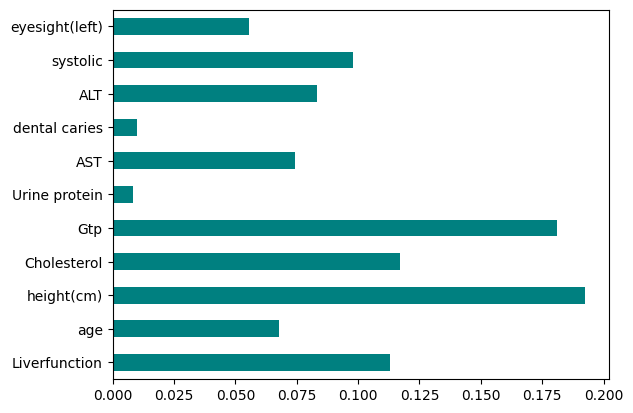

In [ ]:
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [ ]:
# Picking 8 features with heighest importance value

features = data.columns.values
random_forest_importance_selected_features = []

for i in range(0, 8):
  max_importance = max(importances)
  max_importance_index = np.where(importances==max_importance)[0][0]

  if features[max_importance_index] != 'id':
    random_forest_importance_selected_features.append(features[max_importance_index])
  importances[max_importance_index] = 0

In [ ]:
print(random_forest_importance_selected_features)

['height(cm)', 'Gtp', 'Cholesterol', 'Liverfunction', 'systolic', 'ALT', 'AST', 'age']


### Forward Selection

A process where a subset of relevant features is selected from a larger set of available features to build a model. Forward selection is specifically used in the context of machine learning to choose the most relevant features that contribute significantly to the predictive power of the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define the logistic regression model
model = LogisticRegression()

# Define the forward selection object
sfs = SFS(model, k_features=8, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X, y)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

Selected Features: ('2', '3', '4', '5', '6', '7', '9', '10')
Accuracy: 0.7179475780234733


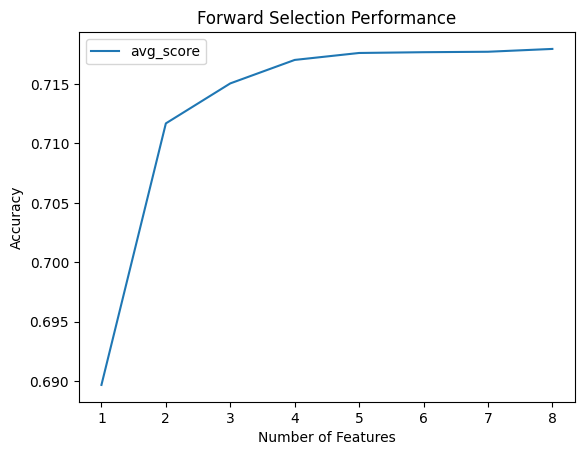

In [ ]:
# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

In [ ]:
features = data.columns.values
forward_selection_features = []

for index in sfs.k_feature_names_:
  forward_selection_features.append(features[int(index)])

In [ ]:
print(forward_selection_features)

['height(cm)', 'Cholesterol', 'Gtp', 'Urine protein', 'AST', 'dental caries', 'systolic', 'eyesight(left)']


### Selecting common features from all four feature selection approaches

In [ ]:
features = data.columns.values
selected_features = []

for feature in features:
  counter = 0
  if feature in information_gain_selected_features:
    counter += 1
  if feature in correlation_coefficient_selected_features:
    counter += 1
  if feature in random_forest_importance_selected_features:
    counter += 1
  if feature in forward_selection_features:
    counter += 1

  if counter >= 3:
    selected_features.append(feature)

In [ ]:
print(selected_features)

['Liverfunction', 'age', 'height(cm)', 'Cholesterol', 'Gtp', 'AST', 'dental caries', 'systolic', 'eyesight(left)']


In [ ]:
selected_features.append('smoking')
data = data[selected_features]
data.head()

,Liverfunction,age,height(cm),Cholesterol,Gtp,AST,dental caries,systolic,eyesight(left),smoking
0,0.104737,0.538462,-0.036550,-0.850927,0.062914,0.140845,0,0.999098,0.176471,1
1,0.074583,0.769231,-0.036550,-0.065644,0.096026,0.211268,1,1.885635,0.235294,0
2,0.105986,0.000000,0.531029,-0.636759,0.149007,0.211268,0,-0.371004,0.117647,1
3,0.127380,0.230769,1.666186,-0.565370,0.072848,0.112676,1,0.676721,0.764706,0
4,0.056815,0.153846,-0.036550,-1.457737,0.029801,0.098592,0,-0.129221,0.764706,1


In [ ]:
x = data.iloc[:, 0:8]
y = data["smoking"]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=10)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,stratify=y_test,test_size=0.5,random_state=10)

train_data=pd.concat([x_train ,y_train],axis=1)
train_data.head
train_data.to_csv("training_data.csv")
Validation_data=pd.concat([x_valid ,y_valid],axis=1)
Validation_data.head
Validation_data.to_csv("validation_data.csv")
Testing_data=pd.concat([x_test ,y_test],axis=1)
Testing_data.head
Testing_data.to_csv("testing_data.csv")